**Install and import required libraries (pandas and matplotlib are usually available)**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

**Load Dataset**

In [114]:
online_Retail = pd.read_excel("D:\\data science\\tata certification\\Online Retail.xlsx")
online_Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Basic Data Cleaning**

In [116]:
df = online_Retail.copy()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [118]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [119]:
# Standardize column names
df.columns = [c.strip().replace(' ', '_').lower() for c in df.columns]

In [120]:
# description is not critical and removing 1,454 rows won’t significantly impact your dataset.
df = df.dropna(subset=['description'])

In [121]:
# Compute line revenue = quantity * unitprice
df['line_revenue'] = df['quantity'] * df['unitprice']
df.head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,line_revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [122]:
df['quantity'].min()

-80995

In [123]:
# Flag returns (negative quantities). In this dataset, negative quantities typically represent returns/cancellations. 0 means no negative value and 1 means negative value
df['is_return'] = [1 if a<0 else 0 for a in df['quantity']]
df.head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,line_revenue,is_return
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0


In [124]:
# Add helpers: year-month, quarter, year, month
df['year'] = df['invoicedate'].dt.year
df['month'] = df['invoicedate'].dt.month
df['year_month'] = df['invoicedate'].dt.to_period('M').astype(str)
df['quarter'] = df['invoicedate'].dt.to_period('Q').astype(str)
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,line_revenue,is_return,year,month,year_month,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,2010,12,2010-12,2010Q4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,2010,12,2010-12,2010Q4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0,2010,12,2010-12,2010Q4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,2010,12,2010-12,2010Q4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,2010,12,2010-12,2010Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0,2011,12,2011-12,2011Q4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,2011,12,2011-12,2011Q4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,2011,12,2011-12,2011Q4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,2011,12,2011-12,2011Q4


In [125]:
df['quarter'].unique()

array(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4'], dtype=object)

In [126]:
# CustomerID sometimes missing; keep for relevant customer-level metrics
df['customerid'] = df['customerid'].astype('Int64')
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,line_revenue,is_return,year,month,year_month,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0,2010,12,2010-12,2010Q4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,2010,12,2010-12,2010Q4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0,2010,12,2010-12,2010Q4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,2010,12,2010-12,2010Q4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,2010,12,2010-12,2010Q4


**Solve Questions**

In [128]:
#1) Revenue Growth: total sales trends over time (monthly/quarterly), and consistency across markets
# We'll compute both Gross Revenue (excluding returns) and Net Revenue (including returns as negatives).

# Gross revenue (exclude returns lines)
gross = df.loc[df['is_return']].groupby('year_month', as_index=False)['line_revenue'].sum().rename(columns={'line_revenue':'gross_revenue'})
# Net revenue (include returns lines)
net = df.groupby('year_month', as_index=False)['line_revenue'].sum().rename(columns={'line_revenue':'net_revenue'})
rev_m = pd.merge(gross, net, on='year_month', how='outer').sort_values('year_month')

In [129]:
# Quarterly
gross_q = df.loc[df['is_return']].groupby('quarter', as_index=False)['line_revenue'].sum().rename(columns={'line_revenue':'gross_revenue'})
net_q = df.groupby('quarter', as_index=False)['line_revenue'].sum().rename(columns={'line_revenue':'net_revenue'})
rev_q = pd.merge(gross_q, net_q, on='quarter', how='outer').sort_values('quarter')

In [130]:
# Per market (country) consistency — monthly net revenue by country
country_month = df.groupby(['country','year_month'], as_index=False)['line_revenue'].sum()

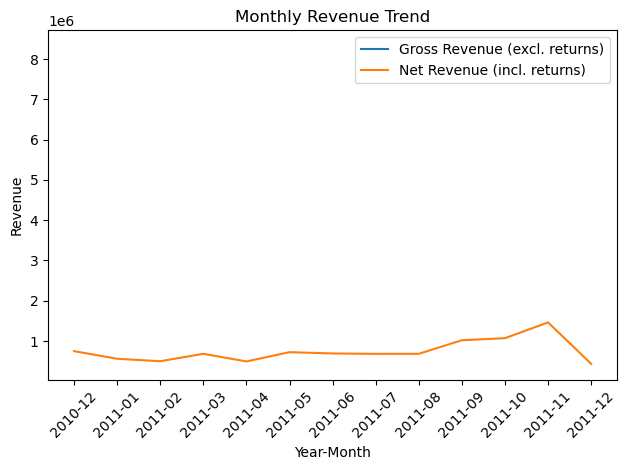

In [131]:
# Plot monthly gross vs net revenue (overall)
plt.figure()
plt.plot(rev_m['year_month'], rev_m['gross_revenue'], label='Gross Revenue (excl. returns)')
plt.plot(rev_m['year_month'], rev_m['net_revenue'], label='Net Revenue (incl. returns)')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

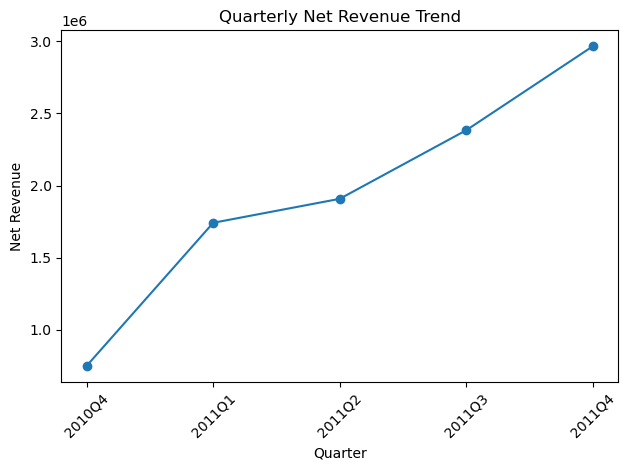

In [132]:
# Plot quarterly net revenue (overall)
plt.figure()
plt.plot(rev_q['quarter'], rev_q['net_revenue'], marker='o')
plt.title('Quarterly Net Revenue Trend')
plt.xlabel('Quarter')
plt.ylabel('Net Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [133]:
# Show top 10 countries by total net revenue and their trend consistency (variance of monthly growth rates)
country_totals = df.groupby('country', as_index=False)['line_revenue'].sum().rename(columns={'line_revenue':'total_net_revenue'})
top_countries = country_totals.sort_values('total_net_revenue', ascending=False).head(10)['country'].tolist()
print(top_countries)

['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Switzerland', 'Spain', 'Belgium', 'Sweden']


In [134]:
# Compute month-over-month growth for each top country and its volatility (std)
def compute_mom_growth(sub):
    sub = sub.sort_values('year_month')
    sub['prev'] = sub['line_revenue'].shift(1)
    sub['mom_growth'] = (sub['line_revenue'] - sub['prev'])/sub['prev']
    return sub

In [135]:
cm_top = country_month[country_month['country'].isin(top_countries)].groupby('country', group_keys=False).apply(lambda g: compute_mom_growth(g).assign(country=g.name),include_groups=False)
volatility = cm_top.groupby('country', as_index=False)['mom_growth'].std().rename(columns={'mom_growth': 'mom_growth_std'})
consistency_table = pd.merge(country_totals[country_totals['country'].isin(top_countries)], volatility, on='country', how='left').sort_values('total_net_revenue', ascending=False)
consistency_table

,country,total_net_revenue,mom_growth_std
9,United Kingdom,8187806.364,0.367932
5,Netherlands,284661.540,439.464976
2,EIRE,263276.820,1.066248
4,Germany,221698.210,0.536826
3,France,197403.900,1.061660
0,Australia,137077.270,11.946139
8,Switzerland,56385.350,0.830426
6,Spain,54774.580,1.129911
1,Belgium,40910.960,0.502882
7,Sweden,36595.910,3.140040


In [143]:
# 2 Customer Value: average revenue per customer overall and by country
# We'll compute ARPC (Average Revenue per Customer) = total net revenue / distinct customers.
customer_rev = df.dropna(subset=['customerid']).groupby('customerid', as_index=False)['line_revenue'].sum().rename(columns={'line_revenue':'customer_net_revenue'})
arpc_overall = customer_rev['customer_net_revenue'].mean()
arpc_overall

1898.4597012808783

In [145]:
cust_country = df.dropna(subset=['customerid']).groupby(['country','customerid'], as_index=False)['line_revenue'].sum()
arpc_by_country = cust_country.groupby('country', as_index=False)['line_revenue'].mean().rename(columns={'line_revenue':'avg_rev_per_customer'})

In [147]:
country_totals_nonnull = df.dropna(subset=['customerid']).groupby('country', as_index=False)['line_revenue'].sum().rename(columns={'line_revenue':'country_revenue'})
top15 = country_totals_nonnull.sort_values('country_revenue', ascending=False).head(15)['country'].tolist()
arpc_top15 = arpc_by_country[arpc_by_country['country'].isin(top15)].sort_values('avg_rev_per_customer', ascending=False)

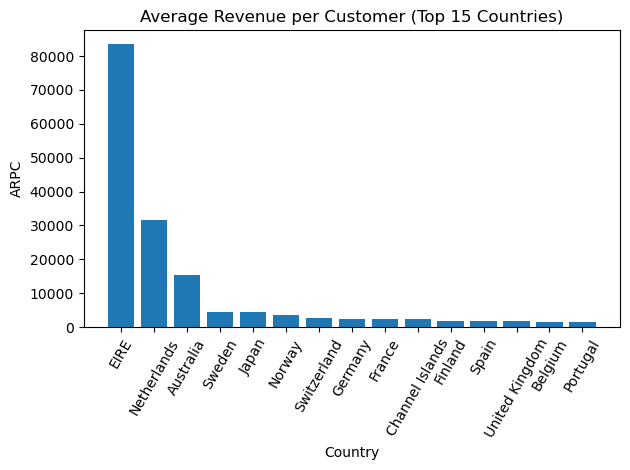

In [149]:
# Plot ARPC by top 15 countries by total revenue
plt.figure()
plt.bar(arpc_top15['country'], arpc_top15['avg_rev_per_customer'])
plt.title('Average Revenue per Customer (Top 15 Countries)')
plt.xlabel('Country')
plt.ylabel('ARPC')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [151]:
# 3 Product Performance: highest revenue and (proxy) underperformers
# Profit is not available in this dataset; we will report revenue (net & gross) and quantity sold.
prod = df.groupby(['stockcode','description'], as_index=False).agg(
    gross_revenue=('line_revenue', lambda x: x[df.loc[x.index, 'is_return']==False].sum()),
    net_revenue=('line_revenue','sum'),
    total_qty=('quantity','sum'),
    num_invoices=('invoiceno','nunique')
)

In [153]:
top_products = prod.sort_values('net_revenue', ascending=False).head(20)
bottom_products = prod.sort_values('net_revenue', ascending=True).head(20)

In [163]:
print("Top 20 Products by Net Revenue")
top_products

Top 20 Products by Net Revenue


,stockcode,description,gross_revenue,net_revenue,total_qty,num_invoices
4780,DOT,DOTCOM POSTAGE,206248.77,206245.48,707,709
1464,22423,REGENCY CAKESTAND 3 TIER,174484.74,164762.19,13033,2169
3045,47566,PARTY BUNTING,99504.33,98302.98,18022,1706
4373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,104340.29,97715.99,35025,2235
4360,85099B,JUMBO BAG RED RETROSPOT,94340.05,92356.03,47363,2135
2254,23084,RABBIT NIGHT LIGHT,66964.99,66756.59,30680,1009
4783,POST,POSTAGE,78101.88,66230.64,3003,1250
1117,22086,PAPER CHAIN KIT 50'S CHRISTMAS,64952.29,63791.94,18902,1170
3291,84879,ASSORTED COLOUR BIRD ORNAMENT,59094.93,58959.73,36381,1467
3128,79321,CHILLI LIGHTS,54117.76,53768.06,10229,669


In [165]:
print("Bottom 20 Products by Net Revenue (Potential Underperformers)")
bottom_products

Bottom 20 Products by Net Revenue (Potential Underperformers)


,stockcode,description,gross_revenue,net_revenue,total_qty,num_invoices
4762,AMAZONFEE,AMAZON FEE,13761.090,-221520.500,-30,34
4781,M,Manual,78110.270,-68674.190,3164,517
4763,B,Adjust bad debt,-11062.060,-11062.060,3,3
4766,CRUK,CRUK Commission,0.000,-7933.430,-16,16
4764,BANK CHARGES,Bank Charges,165.001,-7175.639,-13,36
4767,D,Discount,0.000,-5696.220,-1194,65
4784,S,SAMPLES,63.050,-3049.390,-59,19
3938,79323W,WHITE CHERRY LIGHTS,0.000,-54.000,-8,1
3351,85063,CREAM SWEETHEART MAGAZINE RACK,0.000,-46.850,-3,2
2946,35400,WOODEN BOX ADVENT CALENDAR,89.500,-45.700,-6,13


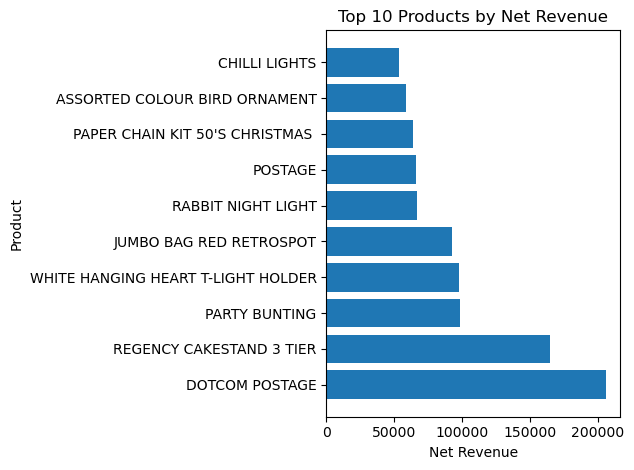

In [167]:
# Plot top 10 products by net revenue
tp10 = top_products.head(10)
plt.figure()
plt.barh(tp10['description'], tp10['net_revenue'])
plt.title('Top 10 Products by Net Revenue')
plt.xlabel('Net Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [175]:
# 4 Operational Efficiency: returns/cancellations proportion & impact
# Proportion of invoices with any return line & proportion of lines that are returns
invoice_return = df.groupby('invoiceno', as_index=False)['is_return'].any().rename(columns={'is_return':'has_return'})
prop_invoices_with_return = invoice_return['has_return'].mean()
prop_invoices_with_return

0.17630696228421827

In [173]:
line_return_prop = df['is_return'].mean()
line_return_prop

0.018062558399866778

In [181]:
# Revenue impact: returns as a % of gross revenue
total_gross_revenue = df.loc[df['is_return'],'line_revenue'].sum()
total_returns_value = -df.loc[df['is_return'],'line_revenue'].sum()  # returns are negative
returns_as_pct_of_gross = total_returns_value / total_gross_revenue if total_gross_revenue != 0 else np.nan
returns_as_pct_of_gross

-1.0

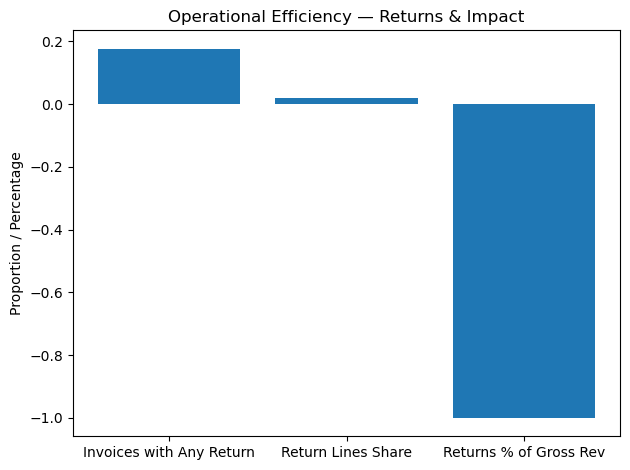

In [183]:
# Plot returns impact
plt.figure()
plt.bar(['Invoices with Any Return','Return Lines Share','Returns % of Gross Rev'],
        [prop_invoices_with_return, line_return_prop, returns_as_pct_of_gross])
plt.title('Operational Efficiency — Returns & Impact')
plt.ylabel('Proportion / Percentage')
plt.tight_layout()
plt.show()

In [185]:
# 5 Customer Segmentation: top customers by frequency & spending; purchasing patterns
cust_orders = df.dropna(subset=['customerid']).groupby('customerid').agg(
    orders=('invoiceno','nunique'),
    total_spend=('line_revenue','sum'),
    avg_basket_value=('line_revenue','mean'),
    items_per_order=('quantity', lambda x: x.sum() / df.loc[x.index, 'invoiceno'].nunique() if df.loc[x.index, 'invoiceno'].nunique() > 0 else np.nan),
    last_purchase=('invoicedate','max')
).reset_index()

In [187]:
top_customers_spend = cust_orders.sort_values('total_spend', ascending=False).head(20)
top_customers_freq  = cust_orders.sort_values('orders', ascending=False).head(20)

In [189]:
print("Top 20 Customers by Total Spend")
top_customers_spend

Top 20 Customers by Total Spend


,customerid,orders,total_spend,avg_basket_value,items_per_order,last_purchase
1703,14646,77,279489.02,134.047492,2554.792208,2011-12-08 12:12:00
4233,18102,62,256438.49,592.236697,1034.225806,2011-12-09 11:50:00
3758,17450,55,187482.17,534.137236,1255.072727,2011-12-01 13:29:00
1895,14911,248,132572.62,22.458516,311.209677,2011-12-08 15:54:00
55,12415,26,123725.45,159.030141,2970.846154,2011-11-15 14:22:00
1345,14156,66,113384.14,79.847986,864.015152,2011-11-30 10:54:00
3801,17511,46,88125.38,81.900911,1369.826087,2011-12-07 10:12:00
3202,16684,31,65892.08,234.491388,1593.225806,2011-12-05 14:06:00
1005,13694,60,62653.10,107.099316,1030.050000,2011-12-06 09:32:00
2192,15311,118,59419.34,23.853609,319.661017,2011-12-09 12:00:00


In [191]:
print("Top 20 Customers by Order Frequency")
top_customers_freq

Top 20 Customers by Order Frequency


,customerid,orders,total_spend,avg_basket_value,items_per_order,last_purchase
1895,14911,248,132572.62,22.458516,311.209677,2011-12-08 15:54:00
330,12748,224,29072.10,6.262839,108.080357,2011-12-09 12:20:00
4042,17841,169,40340.78,5.053336,135.295858,2011-12-08 12:07:00
1674,14606,128,11713.85,4.210586,46.703125,2011-12-08 19:28:00
568,13089,118,57385.88,30.902466,260.906780,2011-12-07 09:02:00
2192,15311,118,59419.34,23.853609,319.661017,2011-12-09 12:00:00
487,12971,89,10930.26,35.487857,103.404494,2011-12-06 12:20:00
1615,14527,86,7711.38,7.627478,23.825581,2011-12-07 12:19:00
803,13408,81,27487.41,54.865090,199.000000,2011-12-08 09:05:00
1703,14646,77,279489.02,134.047492,2554.792208,2011-12-08 12:12:00


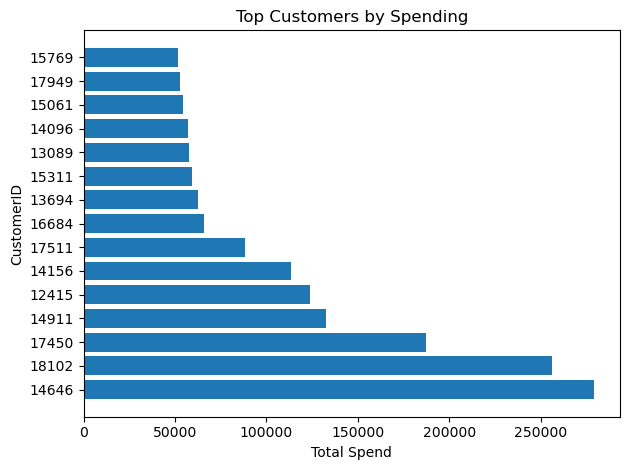

In [193]:
# Plot top 15 customers by spend
tc15 = top_customers_spend.head(15)
plt.figure()
plt.barh(tc15['customerid'].astype(str), tc15['total_spend'])
plt.title('Top Customers by Spending')
plt.xlabel('Total Spend')
plt.ylabel('CustomerID')
plt.tight_layout()
plt.show()

In [207]:
# 6 Market Expansion: countries with strongest growth potential and highest AOV
# AOV = revenue / number of invoices per country
country_orders = df.groupby('country').agg(
    total_revenue=('line_revenue','sum'),
    orders=('invoiceno','nunique')
).reset_index()
country_orders['aov'] = country_orders['total_revenue'] / country_orders['orders']
country_orders

,country,total_revenue,orders,aov
0,Australia,137077.270,69,1986.627101
1,Austria,10154.320,19,534.437895
2,Bahrain,548.400,4,137.100000
3,Belgium,40910.960,119,343.789580
4,Brazil,1143.600,1,1143.600000
5,Canada,3666.380,6,611.063333
6,Channel Islands,20086.290,33,608.675455
7,Cyprus,12946.290,20,647.314500
8,Czech Republic,707.720,5,141.544000
9,Denmark,18768.140,21,893.720952


In [205]:
# Compute revenue by country by year (for growth rate)
cy = df.groupby(['country','year'], as_index=False)['line_revenue'].sum().rename(columns={'line_revenue':'revenue'})
cy

,country,year,revenue
0,Australia,2010,1005.100
1,Australia,2011,136072.170
2,Austria,2010,257.040
3,Austria,2011,9897.280
4,Bahrain,2010,205.740
...,...,...,...
56,USA,2011,1730.920
57,United Arab Emirates,2011,1902.280
58,United Kingdom,2010,676742.620
59,United Kingdom,2011,7511063.744


In [199]:
# Keep only countries present in both years for growth calc
years = sorted(df['year'].dropna().unique())
if len(years) >= 2:
    base_year, last_year = years[0], years[-1]
    base = cy[cy['year']==base_year][['country','revenue']].rename(columns={'revenue':'rev_base'})
    last = cy[cy['year']==last_year][['country','revenue']].rename(columns={'revenue':'rev_last'})
    growth = pd.merge(base, last, on='country', how='inner')
    growth['growth_rate'] = (growth['rev_last'] - growth['rev_base'])/growth['rev_base']
    market_eval = pd.merge(country_orders, growth[['country','growth_rate']], on='country', how='left')
else:
    market_eval = country_orders.copy()
    market_eval['growth_rate'] = np.nan

In [203]:
# Show top markets by growth and AOV
top_growth = market_eval.sort_values(['growth_rate','aov'], ascending=[False,False]).head(15)
print("Top Markets by Growth Rate & AOV")
top_growth

Top Markets by Growth Rate & AOV


,country,total_revenue,orders,aov,growth_rate
0,Australia,137077.27,69,1986.627101,134.381723
6,Channel Islands,20086.29,33,608.675455,53.253459
33,Switzerland,56385.35,74,761.964189,41.209814
1,Austria,10154.32,19,534.437895,37.504824
24,Netherlands,284661.54,101,2818.431089,30.405053
31,Spain,54774.58,105,521.662667,27.708569
10,EIRE,263276.82,360,731.324500,27.155955
26,Poland,7213.14,24,300.547500,27.066489
12,Finland,22326.74,48,465.140417,23.007549
3,Belgium,40910.96,119,343.789580,20.603864


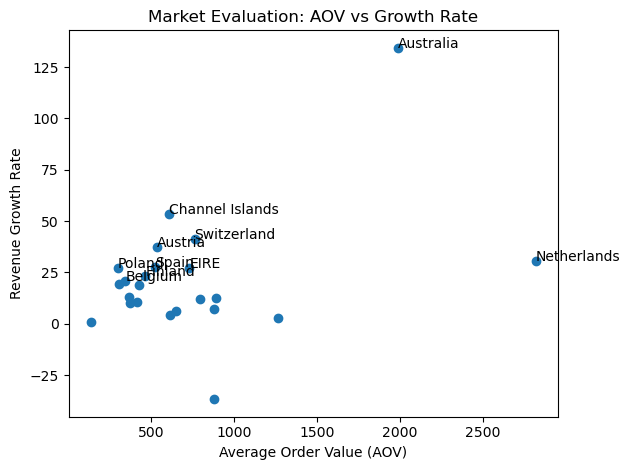

In [209]:
# Scatter: AOV vs Growth (each country a point)
plt.figure()
plt.scatter(market_eval['aov'], market_eval['growth_rate'])
for _, r in market_eval.nlargest(10, 'growth_rate').iterrows():
    plt.annotate(r['country'], (r['aov'], r['growth_rate']))
plt.title('Market Evaluation: AOV vs Growth Rate')
plt.xlabel('Average Order Value (AOV)')
plt.ylabel('Revenue Growth Rate')
plt.tight_layout()
plt.show()

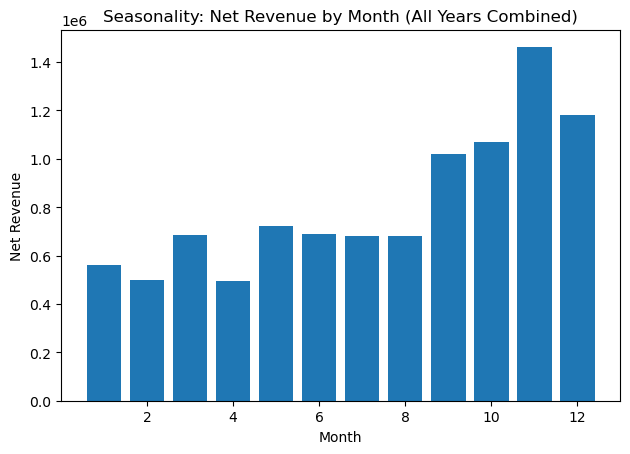

In [211]:
# 7 Seasonality & Demand: monthly spikes
month_rev = df.groupby('month', as_index=False)['line_revenue'].sum().rename(columns={'line_revenue':'net_revenue'})
plt.figure()
plt.bar(month_rev['month'], month_rev['net_revenue'])
plt.title('Seasonality: Net Revenue by Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Net Revenue')
plt.tight_layout()
plt.show()

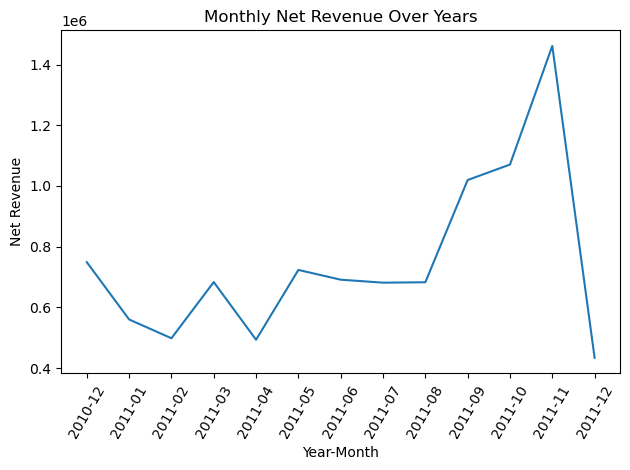

In [213]:
# Also show per-year monthly seasonality (line chart)
ym_rev = df.groupby(['year','month'], as_index=False)['line_revenue'].sum()
ym_rev['year_month'] = ym_rev['year'].astype(str) + '-' + ym_rev['month'].astype(str).str.zfill(2)
plt.figure()
plt.plot(ym_rev['year_month'], ym_rev['line_revenue'])
plt.title('Monthly Net Revenue Over Years')
plt.xlabel('Year-Month')
plt.ylabel('Net Revenue')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [215]:
# 8 Product Preferences: simple keyword-based category mapping
def map_category(desc):
    if isinstance(desc, str):
        d = desc.upper()
        if 'MUG' in d: return 'MUGS'
        if 'BAG' in d: return 'BAGS'
        if 'CARD' in d: return 'CARDS'
        if 'CANDLE' in d: return 'CANDLES'
        if 'CHRISTMAS' in d or 'XMAS' in d or 'TREE' in d or 'DECORATION' in d: return 'SEASONAL/DECOR'
        if 'TIN' in d: return 'TINS'
        if 'PAPER' in d or 'WRAP' in d: return 'STATIONERY'
        if 'GLASS' in d or 'JAR' in d or 'BOTTLE' in d: return 'GLASSWARE'
        if 'TOY' in d or 'GAME' in d: return 'TOYS/GAMES'
        if 'KEY' in d and 'RING' in d: return 'KEYRINGS'
        if 'PLATE' in d or 'BOWL' in d: return 'TABLEWARE'
        if 'LANTERN' in d or 'LIGHT' in d: return 'LIGHTING'
        if 'FRAME' in d: return 'FRAMES'
        if 'RIBBON' in d: return 'CRAFT'
        if 'T-SHIRT' in d or 'T SHIRT' in d: return 'APPAREL'
    return 'OTHER'

df['category'] = df['description'].apply(map_category)

In [217]:
cat_pref = df.groupby('category', as_index=False).agg(
    net_revenue=('line_revenue','sum'),
    orders=('invoiceno','nunique'),
    unique_customers=('customerid','nunique')
).sort_values('net_revenue', ascending=False)

In [219]:
print("Product Category Preferences")
cat_pref

Product Category Preferences


,category,net_revenue,orders,unique_customers
9,OTHER,5209949.384,22002,4248
0,BAGS,1095781.170,9412,2567
13,TINS,701027.880,9687,2945
5,GLASSWARE,630608.630,9458,2907
10,SEASONAL/DECOR,531303.850,7323,2717
7,LIGHTING,462568.110,7789,2490
11,STATIONERY,222695.540,6073,2214
4,FRAMES,185199.700,3621,1228
2,CARDS,170463.970,5396,2093
1,CANDLES,159949.010,4687,1944


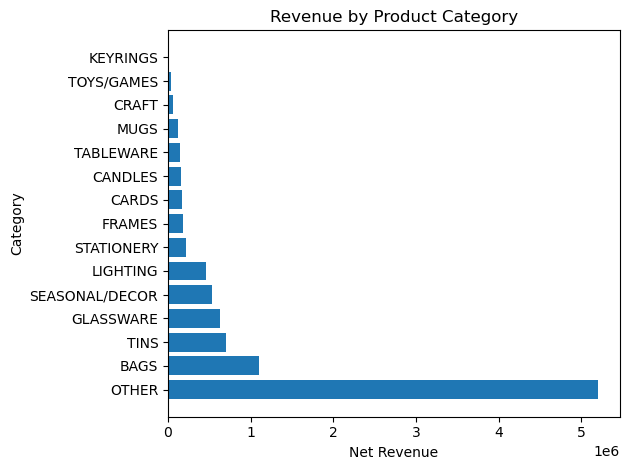

In [221]:
plt.figure()
plt.barh(cat_pref['category'], cat_pref['net_revenue'])
plt.title('Revenue by Product Category')
plt.xlabel('Net Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [229]:
# Save cleaned dataset to CSV instead of Parquet (engine not available)
clean_csv_path = "D:\\data science\\online_retail_cleaned.csv"
df.to_csv(clean_csv_path, index=False)

clean_csv_path


'D:\\data science\\online_retail_cleaned.csv'